

# Project: Investigate No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Assessing">Assessing and Building Intuition</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 

This dataset collects information from 110k medical appointments in Brazil Updated Featuring
we will try here to ask some questions to find out a relationship or a correlation between the data we have been provided 
and it's affection on patient show or no show for there appointment
we have a dataset consisted of 
01) PatientId
02) AppointmentID
03) Gender
04) ScheduledDay
05) AppointmentDay
06) Age
07) Neighbourhood
08) Scholarship
09) Hipertension
10) Diabetes
11) Alcoholism
12) Handcap
13) SMS_received
14) No-show



### Question(s) for Analysis



#  which element have the most impact in attending ?

# Does the gender of the patient affect on attending ?

# And Exploring a relationship between attendance and neighbourhood

# Does the chronic disaese affect the attendance ?

# Does the receiving a SMS effect on the attendance ?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



In [2]:
df= pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

after inspecting for missing values and the types of our data i find out that there is no missing values

# Assessing and Building Intuition

In [9]:
df.shape

(110527, 14)

this returns a tuple of the dimensions of the dataframe

In [12]:
df.describe().round(2)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.00,110527.00,110527.0,110527.0,110527.00,110527.00,110527.00,110527.00
mean,1.474963e+14,5675305.12,37.09,0.1,0.2,0.07,0.03,0.02,0.32
std,2.560949e+14,71295.75,23.11,0.3,0.4,0.26,0.17,0.16,0.47
min,3.921784e+04,5030230.00,-1.00,0.0,0.0,0.00,0.00,0.00,0.00
25%,4.172614e+12,5640285.50,18.00,0.0,0.0,0.00,0.00,0.00,0.00
50%,3.173184e+13,5680573.00,37.00,0.0,0.0,0.00,0.00,0.00,0.00
75%,9.439172e+13,5725523.50,55.00,0.0,0.0,0.00,0.00,0.00,1.00
max,9.999816e+14,5790484.00,115.00,1.0,1.0,1.00,1.00,4.00,1.00


this returns descriptive statistics for each column of data
the avrage age of the patient is 37 about 50 % of the patient age is from (55 to 18) there is a
wrong value in the min age that could not be (negative)


In [12]:
df[df.Age==-1].shape[0]

1

In [14]:
df=df[df.Age>=0]

remove the only patient that have a negative Age 

In [4]:
df["PatientId"].nunique()

62299

this returns the number of unique values in patient ID Column 


### Data Cleaning

 

In [5]:
df.rename(columns={"Hipertension":"Hypertension"},inplace= True)
df.rename(columns={"Handcap":"Handicap"},inplace= True)
df.rename(columns={"No-show":"No_show"},inplace= True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


here i correct the writing of some words in the column heading like hypertension & handicap

In [26]:
df.drop_duplicates(["PatientId"],inplace= True)
df.shape

(62299, 14)

dealing with the duplicated patient ID in the dataset

In [6]:
df.drop(["AppointmentID", "ScheduledDay", "AppointmentDay"], axis = 1, inplace = True)
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


accordinig to the questions that i am trying to answer there is no need for "AppointmentID" , "ScheduledDay","AppointmentDay" so i droped them 

In [7]:
show=df.No_show=="No"
noshow=df.No_show=="Yes"
df[show].count()


PatientId        88208
Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hypertension     88208
Diabetes         88208
Alcoholism       88208
Handicap         88208
SMS_received     88208
No_show          88208
dtype: int64

In [20]:
df[noshow].count()

PatientId        12193
Gender           12193
Age              12193
Neighbourhood    12193
Scholarship      12193
Hypertension     12193
Diabetes         12193
Alcoholism       12193
Handicap         12193
SMS_received     12193
No_show          12193
dtype: int64

number of patient who attended is 50106 and who did not attend is 12193

<a id='eda'></a>
## Exploratory Data Analysis


###   which element have the most impact in attending ?

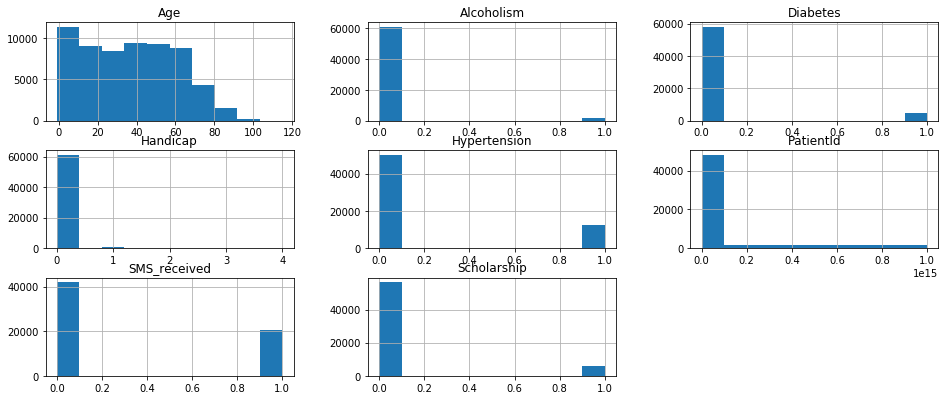

In [21]:
 df.hist(figsize=(16,6.5));

In [28]:
df[noshow].groupby(["Hypertension","Diabetes"]).mean()["Age"],df[show].groupby(["Hypertension","Diabetes"]).mean()["Age"]


(Hypertension  Diabetes
 0             0           28.366490
               1           49.280702
 1             0           58.423077
               1           62.701188
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           30.857729
               1           54.259819
 1             0           60.389957
               1           63.886106
 Name: Age, dtype: float64)

the correlation between chronic diseases like hypertension , daibates and age but there is no strog correlation between that 

# Does the gender of the patient affect on attending ?

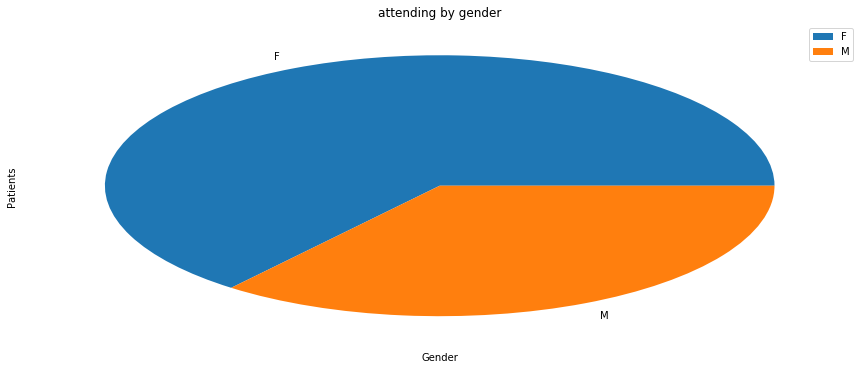

In [29]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[15,6])
    df[col_name][show].value_counts(normalize=True).plot(kind="pie",label="show")
    plt.legend();
    plt.title("attending by gender")
    plt.xlabel("Gender")
    plt.ylabel("Patients");
attendance(df,"Gender",show,noshow)

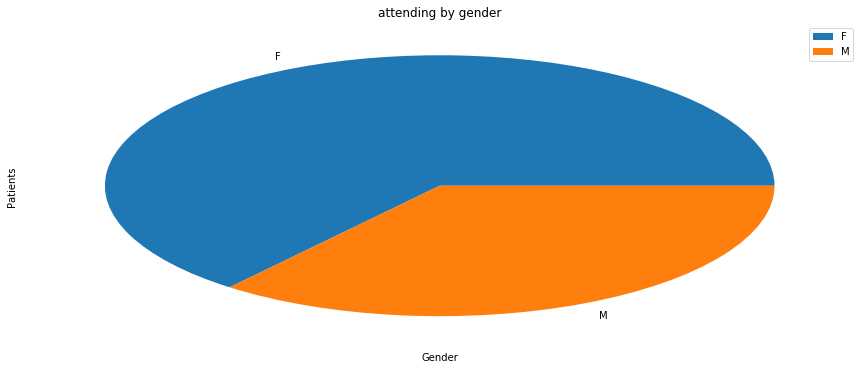

In [30]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[15,6])
    df[col_name][noshow].value_counts(normalize=True).plot(kind="pie",label="noshow")
    plt.legend();
    plt.title("attending by gender")
    plt.xlabel("Gender")
    plt.ylabel("Patients");
attendance(df,"Gender",show,noshow)

almost both of the show and noshow pie are similar so the gender does not affect on attending 

# And Exploring a relationship between attendance and neighbourhood

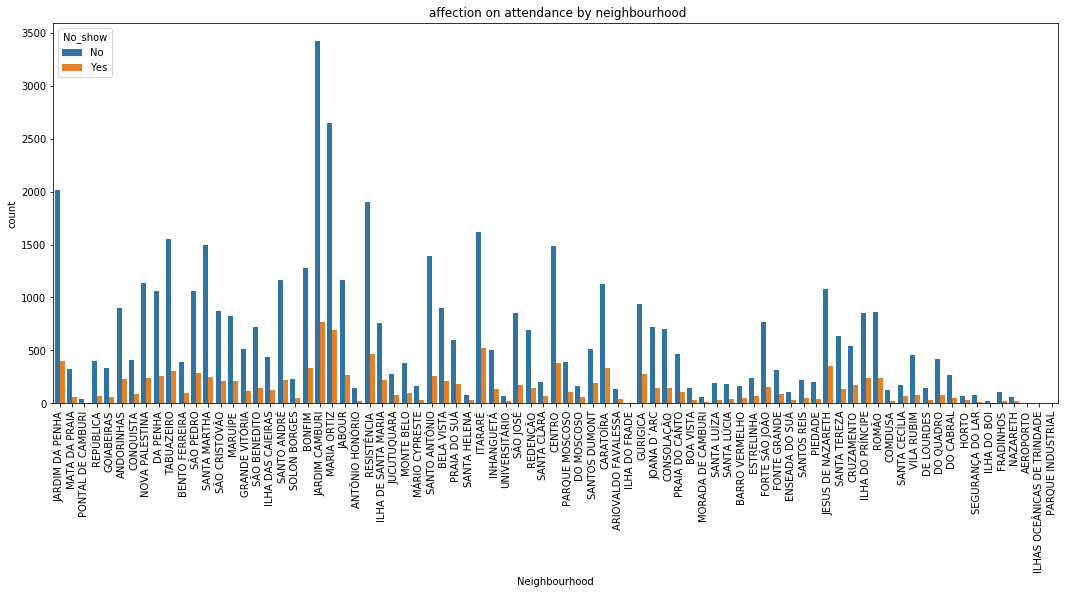

In [31]:
plt.figure(figsize=(18,7))
plt.xticks(rotation=90)
Neighbourhood_effect = snb.countplot(x=df.Neighbourhood , hue=df.No_show)
Neighbourhood_effect.set_title(" affection on attendance by neighbourhood")
plt.show()

seems like only two places affected by neighbourhood ( Maria Ortiz & Jabour )

# Does the chronic disaese affect the attendance ?
(2) here in the histogram is for peaple who suffer from Hypertension & Diabetes


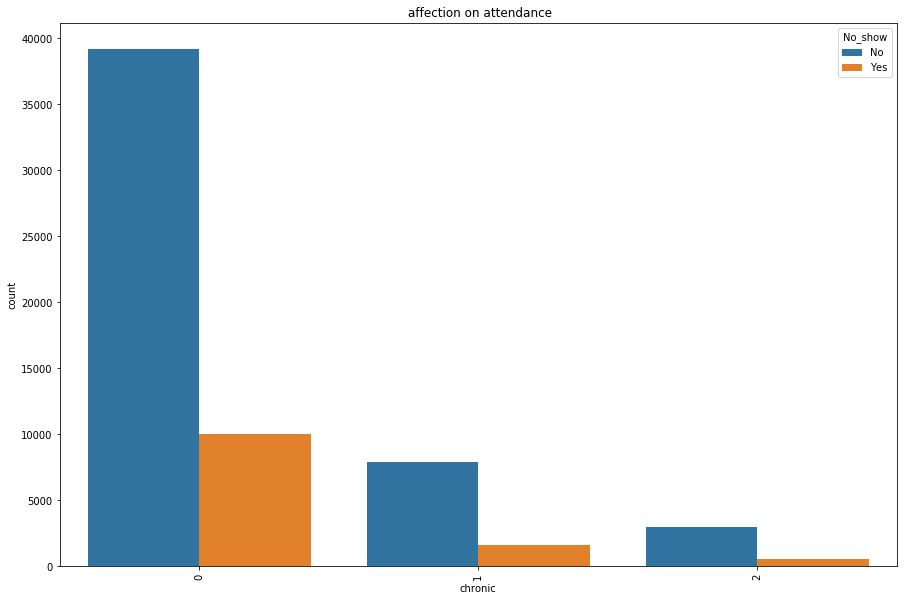

In [32]:
df["chronic"]=df["Hypertension"]+df["Diabetes"]
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
chronic_effect = snb.countplot(x=df.chronic , hue=df.No_show)
chronic_effect.set_title(" affection on attendance")
plt.show()


In [33]:
CD=df.chronic==2
df[CD].count()
#CD referes to chronic diseases

PatientId        3583
Gender           3583
Age              3583
Neighbourhood    3583
Scholarship      3583
Hypertension     3583
Diabetes         3583
Alcoholism       3583
Handicap         3583
SMS_received     3583
No_show          3583
chronic          3583
dtype: int64

we have 3583 patient are suffer from the both chronic diseases but there is no huge affect in attending 

# Does the receiving a SMS effect on the attendance ?


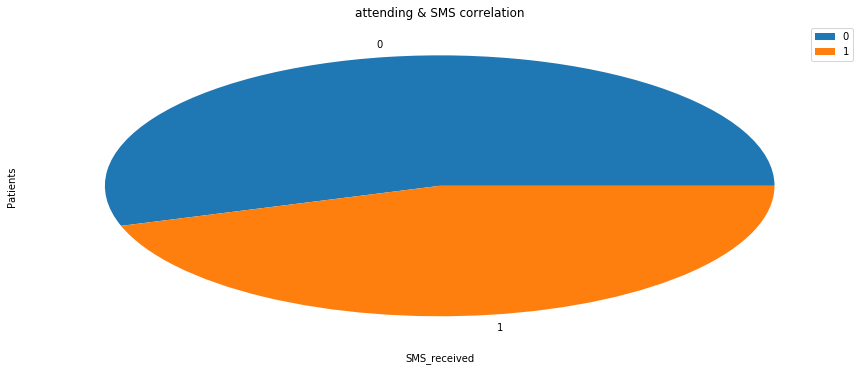

In [34]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[15,6])
    df[col_name][noshow].value_counts(normalize=True).plot(kind="pie",label="noshow")
    plt.legend();
    plt.title("attending & SMS correlation")
    plt.xlabel("SMS_received")
    plt.ylabel("Patients");
attendance(df,"SMS_received",show,noshow)

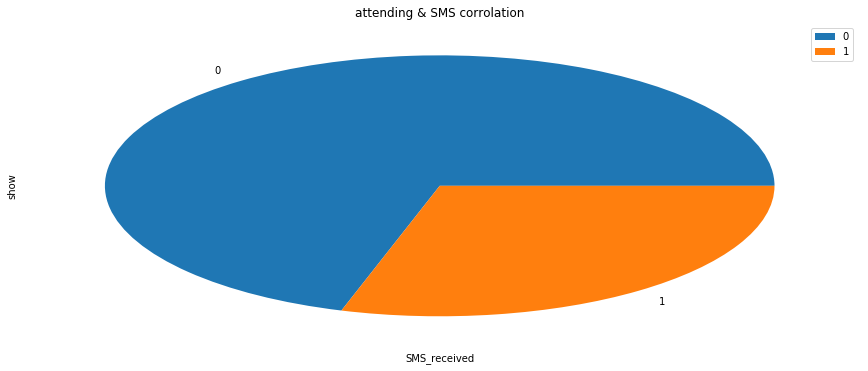

In [36]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[15,6])
    df[col_name][show].value_counts(normalize=True).plot(kind="pie",label="show")
    plt.legend();
    plt.title("attending & SMS corrolation")
    plt.xlabel("SMS_received")
    plt.ylabel("show");
attendance(df,"SMS_received",show,noshow)

In [ ]:
we can see that SMS recivied have a huge infelunce in attending of patient 
so i think that they need 

<a id='conclusions'></a>
## Conclusions
we can see that SMS recivied have a huge infelunce in attending of patient so changing in sms recived can make a huge impact in patient attendice
the correlation between chronic diseases like hypertension , daibates and age is not strog correlation ,
almost both of the show and noshow pie are similar so the gender does not affect on attending ,
seems like only two places strongly affected by neighbourhood ( Maria Ortiz & Jabour ) but generaly it is weak corrlation , 
we have 3583 patient are suffer from the both chronic diseases but there is no huge affect in attending ,
so i think that they need to establish an technical support department to make sure that many people recieved the massage or get a new contract with another telecom firm 

## The limitation
could not find a correlation between some given data like ("AppointmentID", "ScheduledDay", "AppointmentDay") and show or noshow of the patient .
i think it is will be a good idea if we add a survey column with a scale 1 to 5 telling us how much patiant are satisfied of the service . it also will give us a good indicater if they will show or not and will give us also an indicator of which sectors that need some inerest in the future  . 
## Submitting your Project 



In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0